Chapter 33
# 鸢尾花曲线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from math import factorial

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
def comb(n, k):
    return factorial(n) // (factorial(k) * factorial(n-k))

def get_bezier_curve(points):
    n = len(points) - 1
    return lambda t: sum(comb(n, i)*t**i * (1-t)**(n-i)*points[i] for i in range(n+1))

def evaluate_bezier(points, total):
    bezier = get_bezier_curve(points)
    new_points = np.array([bezier(t) for t in np.linspace(0, 1, total)])
    return new_points[:, 0], new_points[:, 1]

In [31]:
# 定义散点数量
randPntNum = 20
tPntNum = 500
tList = np.arange(1, tPntNum + 1)

# 产生连续变化的角度
randList1 = (np.random.rand(randPntNum) - 0.5) * 2 * np.pi
randList2 = (np.random.rand(randPntNum) - 0.5) * 2 * np.pi
randList3 = (np.random.rand(randPntNum) - 0.5) * 2 * np.pi
thetaList1 = np.interp(tList, np.linspace(1, randPntNum, randPntNum), randList1, period=2*np.pi)
thetaList2 = np.interp(tList, np.linspace(1, randPntNum, randPntNum), randList2, period=2*np.pi)
thetaList3 = np.interp(tList, np.linspace(1, randPntNum, randPntNum), randList3, period=2*np.pi)

# 设定色谱颜色

CList = np.array([[4, 99, 128],
                  [22, 25, 59],
                  [53, 71, 140],
                  [78, 122, 199],
                  [127, 178, 240],
                  [173, 213, 247]]) / 255
ti = np.linspace(1, tPntNum, CList.shape[0])
CList = np.column_stack([np.interp(tList, ti, CList[:, i], period=2*np.pi) for i in range(3)])

### 可视化

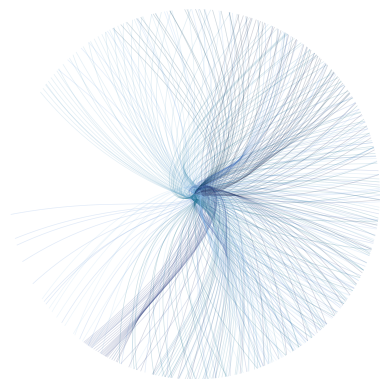

In [31]:
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

# 随机生成两个椭圆参数
A1 = np.random.rand()
B1 = np.random.rand()
A2 = np.random.rand()
B2 = np.random.rand()

# 产生贝塞尔曲线
for i in range(tPntNum):
    X = np.array([0, A1 * np.cos(thetaList1[i]), A2 * np.cos(thetaList2[i]), np.cos(thetaList3[i])])
    Y = np.array([0, B1 * np.sin(thetaList1[i]), B2 * np.sin(thetaList2[i]), np.sin(thetaList3[i])])
    bx, by = evaluate_bezier(np.column_stack([X, Y]), 200)
    plt.plot(bx, by, color=np.append(CList[i, :], 0.2), linewidth=0.5)

fig.savefig('Figures/鸢尾花曲线，贝塞尔.svg', format='svg')

Oliver Brotherhood鸢尾花开源设计：<br>
https://openprocessing.org/sketch/418113  
<br>
代码参考：  
https://zhuanlan.zhihu.com/p/597953851

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023